**TASK DETAILS**
- Using Yellow Taxi Trip dataset, we have to perform clustering to find locations that may belong to a particular cluster  having similar kinds of trip features.
- For the completion of task, we will use DBSCAN non parametric clustering algorithm which stands for "Density Based Spatial Clustering Application of Noise".
- After defining the clusters we have to perform analysis of trips belonging to the same clusters and point out the distinguishing features and insights.
- Then, we will have to divide a day into 1 hour slot and show a time of day based analysis of each cluster.   

**To proceed with your task of clustering taxi trip data using DBSCAN, we'll need to follow these steps:**

1. Load and preprocess the dataset.
2. Select a subset of the data (up to 100,000 rows) due to computational constraints.
3. Perform DBSCAN clustering.
4. Visualize the clusters on a map.
5. Analyze the trips belonging to each cluster and extract insights.
6. Perform a time-of-day analysis for each cluster.

# **IMPORTING LIBRARIES**

In [ ]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
from sklearn.cluster import DBSCAN  # Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
import matplotlib.pyplot as plt  # Plotting library
import numpy as np  # Library for numerical computing
from sklearn import metrics  # Module containing various metrics for evaluating clustering algorithms
from sklearn.preprocessing import LabelEncoder  # Encode categorical features as integers
import geopandas as gpd  # Library for working with geospatial data
from shapely.geometry import Point  # Geometric objects library for GeoPandas
from sklearn.neighbors import NearestNeighbors  # Unsupervised learner for implementing nearest neighbors algorithm
import pyproj  # Python interface to PROJ library for cartographic projections and coordinate transformations
import seaborn as sns  # Statistical data visualization library


# **DATA PREPARATION**

**We will first work on the main dataset.**

In [ ]:
# Step 1: Load main data
# Read data from a Parquet file into a pandas DataFrame
data = pd.read_parquet('/content/drive/MyDrive/yellow_tripdata_2023-01.parquet')

# Display the first few rows of the DataFrame to inspect the loaded data
data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [ ]:
# Display Information about the Data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
# Check for Missing Values
data.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

**Now that we see there columns with null values, we will follow the approach:**

Null values in passenger_count are replaced with the median as feature is of numerical type, mode for RatecodeID and store_and_fwd_flag as they are of categorical type, or 0 for congestion_surcharge and airport_fee to ensure data completeness and maintain the integrity of the dataset.



In [ ]:
# Replace Null Values
# Replace missing values in 'passenger_count' column with the median value of the column
data['passenger_count'].fillna(data['passenger_count'].median(), inplace=True)

# Replace missing values in 'RatecodeID' column with the mode (most frequent value) of the column
data['RatecodeID'].fillna(data['RatecodeID'].mode()[0], inplace=True)

# Replace missing values in 'store_and_fwd_flag' column with the mode of the column
data['store_and_fwd_flag'].fillna(data['store_and_fwd_flag'].mode()[0], inplace=True)

# Replace missing values in 'congestion_surcharge' column with 0
data['congestion_surcharge'].fillna(0, inplace=True)

# Replace missing values in 'airport_fee' column with 0
data['airport_fee'].fillna(0, inplace=True)


In [ ]:
#let us have a look at our data once again to make sure values are replaced as expected
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [ ]:
#Converting to datetime
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [ ]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [ ]:
data.shape

(3066766, 19)

**Now let's get our location data ready**

In [ ]:
# Step 2: Load Location Data
# Read location data from a CSV file into a pandas DataFrame
location_data = pd.read_csv('/content/drive/MyDrive/ZoneLookup.csv')

In [ ]:
# Display the First Few Rows of Location Data
location_data.head()

,ZoneId,Latitude,Longitude
0,1,191376.7495,9.359968e+05
1,2,164018.7544,1.031086e+06
2,3,254265.4787,1.026453e+06
3,4,202959.7824,9.906340e+05
4,5,140681.3514,9.318714e+05


In [ ]:
# Display Information about Location Data
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZoneId     263 non-null    int64  
 1   Latitude   263 non-null    float64
 2   Longitude  263 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.3 KB


In [ ]:
# Step 3: Select a Subset of the Data
# Select a random subset of the data with up to 100,000 rows
subset_data = data.sample(n=min(100000, len(data)))

# Step 4: Combine Latitude and Longitude Information with Main Dataset
# Merge the latitude and longitude information from location_data with the main dataset based on the 'PULocationID' and 'ZoneId' columns
subset_data = pd.merge(subset_data, location_data, left_on='PULocationID', right_on='ZoneId')

In [ ]:
# Display Information about Subset Data
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98699 entries, 0 to 98698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               98699 non-null  int64         
 1   tpep_pickup_datetime   98699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  98699 non-null  datetime64[ns]
 3   passenger_count        98699 non-null  float64       
 4   trip_distance          98699 non-null  float64       
 5   RatecodeID             98699 non-null  float64       
 6   store_and_fwd_flag     98699 non-null  object        
 7   PULocationID           98699 non-null  int64         
 8   DOLocationID           98699 non-null  int64         
 9   payment_type           98699 non-null  int64         
 10  fare_amount            98699 non-null  float64       
 11  extra                  98699 non-null  float64       
 12  mta_tax                98699 non-null  float64       
 13  t

In [ ]:
# Step 5: Drop Unnecessary Columns for Clustering
# Define the columns to drop from the subset data for clustering
columns_to_drop = ['VendorID', 'store_and_fwd_flag']

# Drop the specified columns from the subset data to prepare for clustering
final_data = subset_data.drop(columns=columns_to_drop)

In [ ]:
# Display Information about Final Data
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98699 entries, 0 to 98698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   98699 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  98699 non-null  datetime64[ns]
 2   passenger_count        98699 non-null  float64       
 3   trip_distance          98699 non-null  float64       
 4   RatecodeID             98699 non-null  float64       
 5   PULocationID           98699 non-null  int64         
 6   DOLocationID           98699 non-null  int64         
 7   payment_type           98699 non-null  int64         
 8   fare_amount            98699 non-null  float64       
 9   extra                  98699 non-null  float64       
 10  mta_tax                98699 non-null  float64       
 11  tip_amount             98699 non-null  float64       
 12  tolls_amount           98699 non-null  float64       
 13  i

# **DBSCAN ALGORITHM**

In [ ]:
# Step 6: Perform DBSCAN
# Define epsilon and min_samples parameters for DBSCAN algorithm
epsilon = 0.01  # Adjust epsilon as needed
min_samples = 36  # Adjust min_samples as needed

# Initialize DBSCAN clustering algorithm with specified parameters
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit the DBSCAN model to latitude and longitude data to perform clustering
clusters = dbscan.fit_predict(final_data[['Latitude', 'Longitude']])


In [ ]:
# Step 7: Add Cluster Labels to the Dataset
# Add cluster labels obtained from DBSCAN clustering to the final dataset
final_data['Cluster'] = clusters

In [ ]:
# Display the First Few Rows of Final Data with Cluster Labels
final_data.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,ZoneId,Latitude,Longitude,Cluster
0,2023-01-21 18:59:31,2023-01-21 19:07:27,2.0,1.10,1.0,166,238,1,7.9,2.5,...,2.38,0.0,1.0,14.28,2.5,0.0,166,234186.3269,994834.7873,0
1,2023-01-30 13:54:26,2023-01-30 14:00:53,1.0,0.60,1.0,166,166,2,7.9,0.0,...,0.00,0.0,1.0,9.40,0.0,0.0,166,234186.3269,994834.7873,0
2,2023-01-18 09:04:00,2023-01-18 09:34:00,1.0,4.50,1.0,166,140,0,30.3,0.0,...,6.86,0.0,1.0,41.16,0.0,0.0,166,234186.3269,994834.7873,0
3,2023-01-25 20:23:54,2023-01-25 20:28:23,2.0,0.88,1.0,166,151,1,7.2,1.0,...,2.42,0.0,1.0,12.12,0.0,0.0,166,234186.3269,994834.7873,0
4,2023-01-13 16:47:42,2023-01-13 17:06:37,1.0,3.21,1.0,166,263,2,19.1,2.5,...,0.00,0.0,1.0,25.60,2.5,0.0,166,234186.3269,994834.7873,0
5,2023-01-02 15:34:17,2023-01-02 15:39:49,2.0,1.01,1.0,166,166,2,7.9,0.0,...,0.00,0.0,1.0,9.40,0.0,0.0,166,234186.3269,994834.7873,0
6,2023-01-13 17:31:19,2023-01-13 17:41:38,1.0,1.66,1.0,166,239,1,12.1,2.5,...,2.00,0.0,1.0,20.60,2.5,0.0,166,234186.3269,994834.7873,0
7,2023-01-24 14:54:43,2023-01-24 15:27:47,1.0,4.59,1.0,166,162,1,31.0,0.0,...,7.00,0.0,1.0,42.00,2.5,0.0,166,234186.3269,994834.7873,0
8,2023-01-18 20:42:52,2023-01-18 21:08:52,2.0,6.10,1.0,166,233,1,32.4,3.5,...,7.45,0.0,1.0,44.85,2.5,0.0,166,234186.3269,994834.7873,0
9,2023-01-06 09:31:58,2023-01-06 09:52:00,1.0,3.80,1.0,166,237,2,19.1,2.5,...,0.00,0.0,1.0,23.10,2.5,0.0,166,234186.3269,994834.7873,0


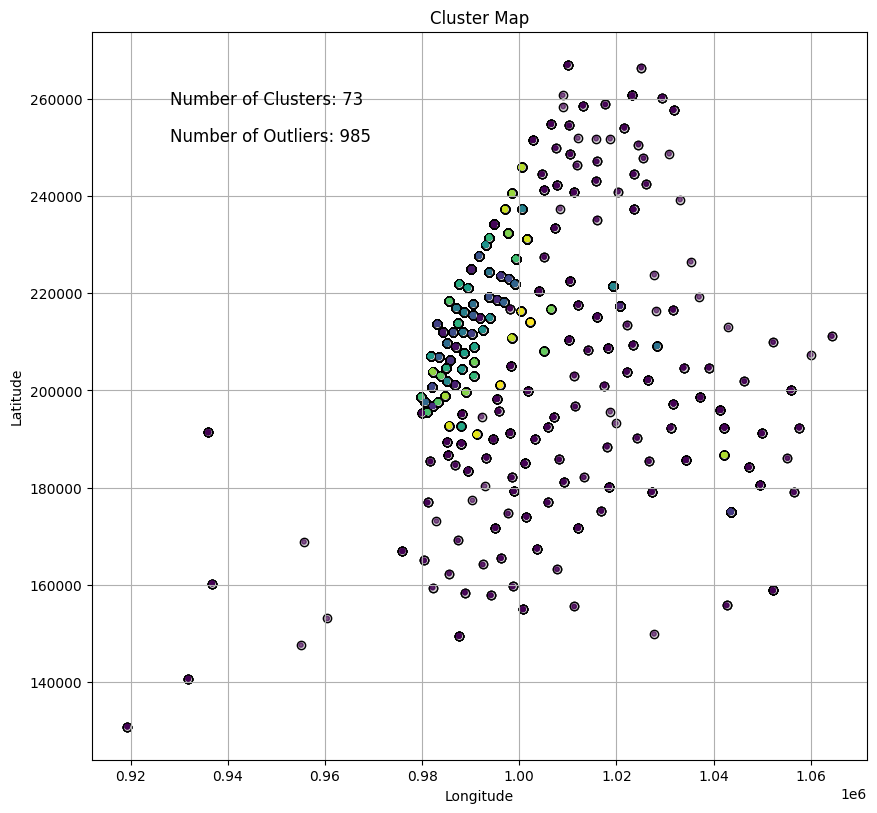

In [ ]:
# Step 8: Convert Coordinates to Longitude and Latitude
import pyproj  # Python interface to PROJ library for cartographic projections and coordinate transformations

# Define the projection as EPSG:2263
proj_in = pyproj.CRS('EPSG:4326')  # Input coordinate reference system (WGS 84)
proj_out = pyproj.CRS('EPSG:4326')  # Output coordinate reference system (WGS 84)

# Convert x and y coordinates to longitude and latitude
transformer = pyproj.Transformer.from_crs(proj_in, proj_out)
final_data['Latitude'], final_data['Longitude'] = transformer.transform(final_data['Latitude'], final_data['Longitude'])

# Step 9: Create GeoDataFrame
import geopandas as gpd  # Library for working with geospatial data
from shapely.geometry import Point  # Geometric objects library for GeoPandas

# Create GeoDataFrame from final_data with longitude and latitude converted
geometry = [Point(xy) for xy in zip(final_data['Longitude'], final_data['Latitude'])]
gdf = gpd.GeoDataFrame(final_data, geometry=geometry)

# Step 10: Ploting using GeoPandas
import matplotlib.pyplot as plt  # Plotting library

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot base map using GeoPandas
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Step 11: Plot Clusters
scatter = ax.scatter(final_data['Longitude'], final_data['Latitude'], c=final_data['Cluster'], cmap='viridis', s=10, alpha=0.6)

# Step 12: Calculate Number of Clusters and Outliers
# Calculate the number of clusters and outliers
num_clusters = len(final_data['Cluster'].unique())
num_outliers = (final_data['Cluster'] == -1).sum()  # Assuming outliers are labeled as -1

# Step 13: Display Information about Clusters and Outliers
# Display information about clusters and outliers on the plot
ax.text(0.1, 0.9, f'Number of Clusters: {num_clusters}', transform=ax.transAxes, fontsize=12)
ax.text(0.1, 0.85, f'Number of Outliers: {num_outliers}', transform=ax.transAxes, fontsize=12)

# Step 14: Set Plot Title and Labels
# Set plot title and axis labels
ax.set_title('Cluster Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add grid to the plot
ax.grid(True)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


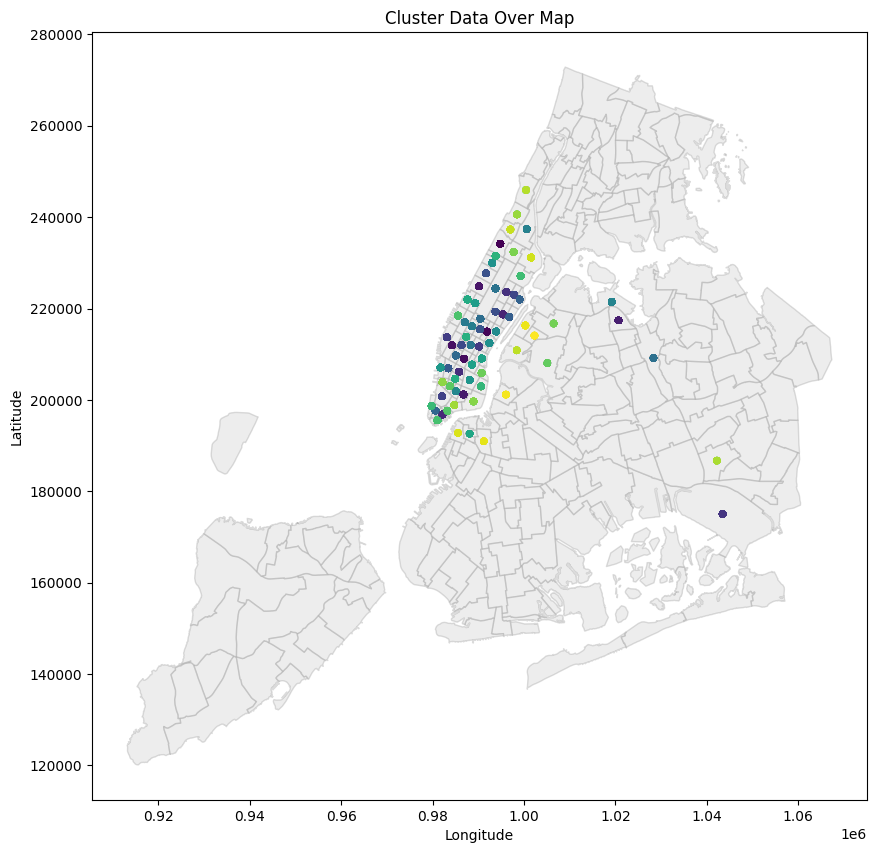

In [ ]:
# Step 15: Visualize Clusters on Map
import geopandas as gpd  # Library for working with geospatial data
from shapely.geometry import Point  # Geometric objects library for GeoPandas
import matplotlib.pyplot as plt  # Plotting library

# Define coordinate reference system (CRS)
crs = {'init': 'EPSG:4326'}

# Create GeoDataFrame with longitude and latitude information
geometry = [Point(xy) for xy in zip(final_data['Longitude'], final_data['Latitude'])]
geo_df = gpd.GeoDataFrame(final_data, crs=crs, geometry=geometry)

# Set figure size
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

# Import NYC Neighborhood Shape Files
nyc_full = gpd.read_file('/content/drive/MyDrive/taxi_zones.zip')
nyc_full.crs = 'epsg:4326'

# Remove outliers from the GeoDataFrame
geo_df = geo_df[geo_df['Cluster'] != -1]

# Plot NYC neighborhood shape files
nyc_full.to_crs(epsg=4326).plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1, aspect='equal')

# Plot clusters on the map
geo_df.plot(ax=ax, column='Cluster', categorical=True, alpha=0.6, cmap='viridis', markersize=20, linewidth=0.8, zorder=2, aspect='equal')

# Set plot title and labels
plt.title('Cluster Data Over Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

# Clear the figure
fig.clf()


# **CLUSTER AND HOURLY ANALYSIS**

In [ ]:
# Step 16: Analysis of Trips Belonging to the Same Clusters
# Group final data by cluster and perform aggregate analysis
cluster_analysis = final_data.groupby('Cluster').agg({
    'passenger_count': 'mean',  # Average passenger count
    'trip_distance': 'mean',  # Average trip distance
    'fare_amount': 'mean',  # Average fare amount
    'tip_amount': 'mean',  # Average tip amount
    'payment_type': lambda x: x.value_counts().index[0],  # Most frequent payment type
})

# Display cluster analysis
print("Cluster Analysis:")
print(cluster_analysis)

# Step 17: Time-of-Day-Based Analysis of Each Cluster
# Extract hour information from pickup datetime
final_data['Hour'] = final_data['tpep_pickup_datetime'].dt.hour

# Group final data by cluster and hour, and count the number of trips in each hour slot
hourly_analysis = final_data.groupby(['Cluster', 'Hour']).size().unstack(fill_value=0)

# Display hourly analysis
print("\nHourly Analysis:")
print(hourly_analysis)


Cluster Analysis:
         passenger_count  trip_distance  fare_amount  tip_amount  payment_type
Cluster                                                                       
-1              1.188832       5.838264    33.473665    2.989218             1
 0              1.295316       2.479287    15.503014    2.933096             1
 1              1.312410       2.311707    14.534782    2.939555             1
 2              1.363463       2.109519    13.792620    2.884649             1
 3              1.373816       2.494866    15.817159    3.013063             1
...                  ...            ...          ...         ...           ...
 67             1.238095       4.887619    25.499048    3.676429             1
 68             1.205128       3.941282    23.644359    2.686923             1
 69             1.243902       0.644390     4.643902    0.580244             3
 70             1.568182       3.755000    18.354545    3.971591             1
 71             1.119048       2.8

# **TEMPORAL-SPATIAL ANALYSIS**

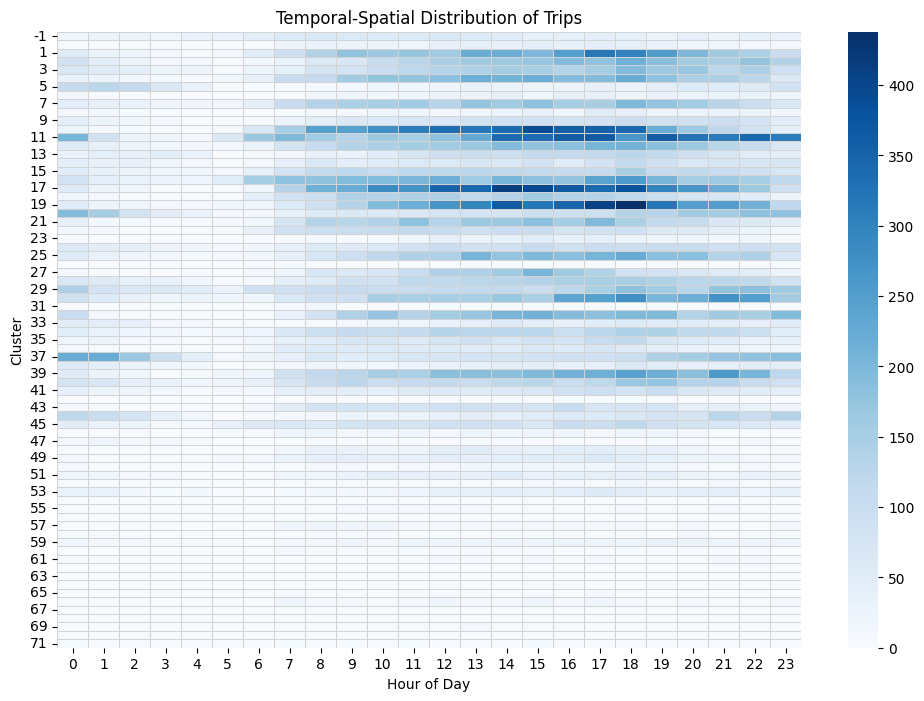

In [ ]:
# Step 18: Temporal-Spatial Analysis: Combine Temporal and Spatial Dimensions
# Group final data by cluster and hour, and count the number of trips in each hour slot
hourly_cluster_counts = final_data.groupby(['Cluster', 'Hour']).size().unstack(fill_value=0)

# Step 19: Plot Temporal-Spatial Distribution of Trips
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization library

# Plot heatmap to visualize temporal-spatial distribution of trips
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_cluster_counts, cmap='Blues', linewidths=0.5, linecolor='lightgrey')
plt.title('Temporal-Spatial Distribution of Trips')
plt.xlabel('Hour of Day')
plt.ylabel('Cluster')
plt.show()


# **COST ANALYSIS**

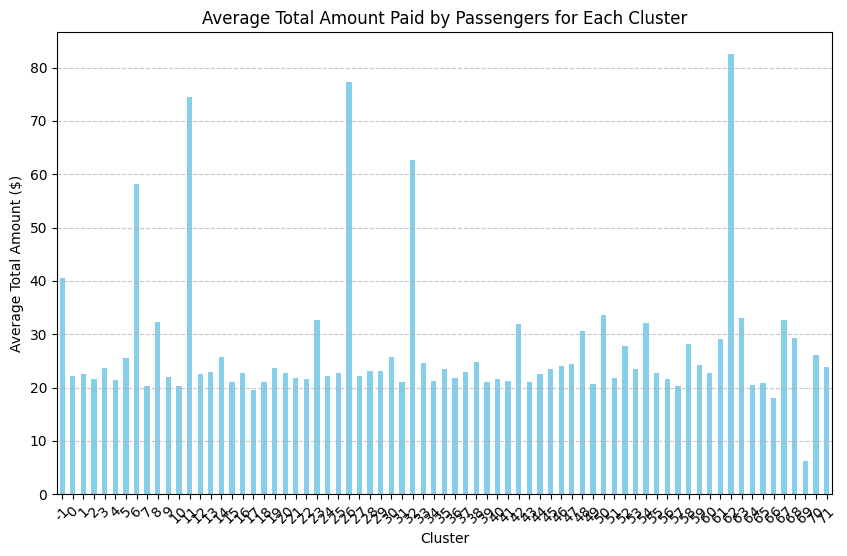

In [ ]:
# Step 20: Cost Analysis: Calculate Average Total Amount Paid by Passengers for Trips Within Each Cluster
# Group final data by cluster and calculate the average total amount paid by passengers
cluster_avg_cost = final_data.groupby('Cluster')['total_amount'].mean()

# Step 21: Plot Average Total Amount Paid by Passengers for Each Cluster
import matplotlib.pyplot as plt  # Plotting library

# Plot bar chart to visualize average total amount paid by passengers for each cluster
plt.figure(figsize=(10, 6))
cluster_avg_cost.plot(kind='bar', color='skyblue')
plt.title('Average Total Amount Paid by Passengers for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **ANSLYSIS OF PROMINENT ANALYSIS**

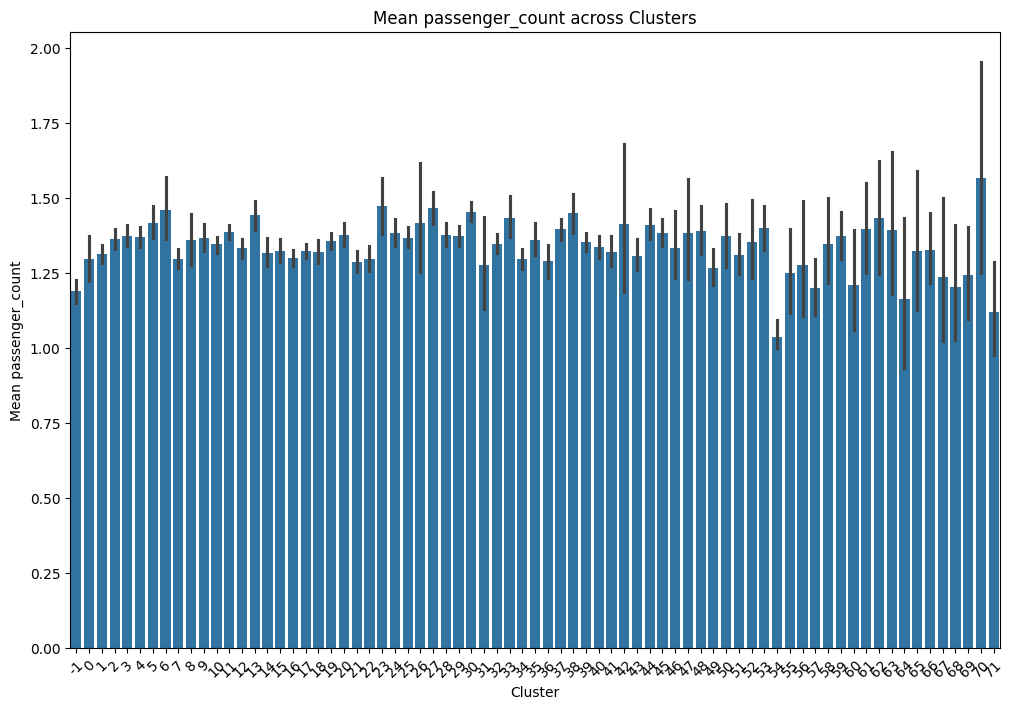

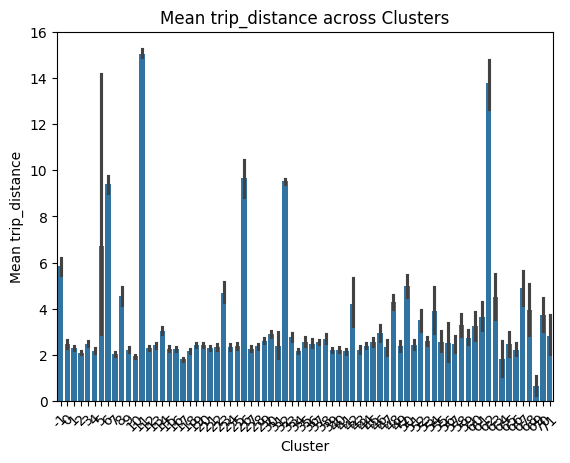

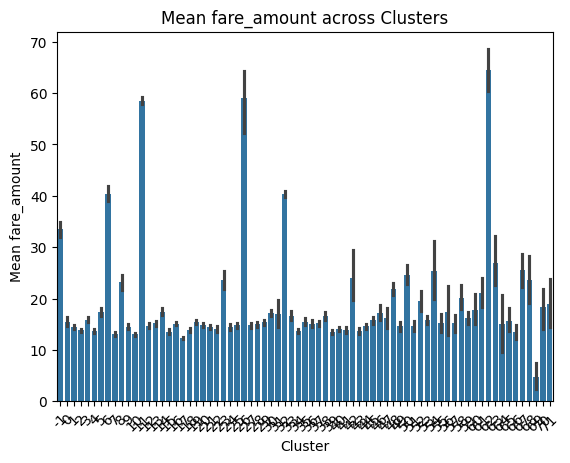

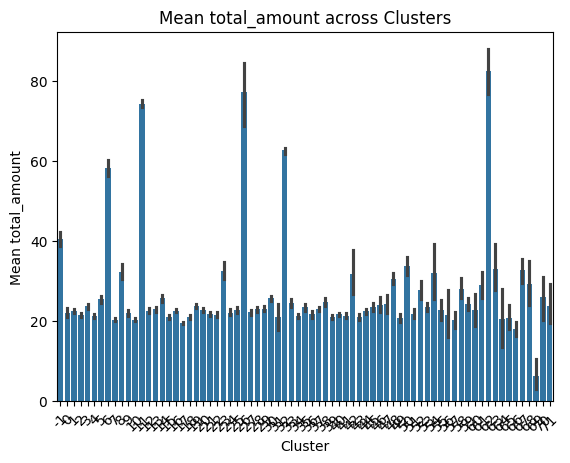

In [ ]:
# Step 22: Define Numerical Features to Analyze
# Define numerical features to analyze
num_features = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount']

# Step 23: Create Bar Plot for Each Numerical Feature Across Different Clusters
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization library

# Create a bar plot for each numerical feature across different clusters
plt.figure(figsize=(12, 8))
for feature in num_features:
    sns.barplot(data=final_data, x='Cluster', y=feature, legend=False)
    plt.title(f'Mean {feature} across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.xticks(rotation=45)
    plt.show()
